In [1]:
import sys
import numpy as np
import scipy
import matplotlib
from matplotlib import pyplot as plt
import sklearn
from imports import *
# to get access to logdust function
%run 'simulation.py'
# plot in-line within the notebook
%matplotlib inline

finished running simulation


In [20]:
def cart2pol(x, y):
    '''Return polar coordinate from cartesian coordinate'''
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return [r, phi]

def pol2cart(r, theita):
    '''Return cartesian coordinate from polar coordinate'''
    x = r * np.cos(theita)
    y = r * np.sin(theita)
    return [x, y]

def save_data_with_samp(filename):
    np.savez(filename, 
         Xgrid=Xgrid, logdust_grid=Ygrid_samps,  # model grid
         X_train=X_train, X_valid=X_valid, X_test=X_test,  # locations (true)
         Xo_train=Xo_train, Xo_valid=Xo_valid, Xo_test=Xo_test,  # locations (measured)
         Xo_samp_train=Xo_samp_train, Xo_samp_valid=Xo_samp_valid, Xo_samp_test=Xo_samp_test,  #locations (sampled)
         Xe_train=Xe_train, Xe_valid=Xe_valid, Xe_test=Xe_test,  # locations (error)
         Y_train=Y_train, Y_valid=Y_valid, Y_test=Y_test,  # dust (true)
         Yo_train=Yo_train, Yo_valid=Yo_valid, Yo_test=Yo_test,  # dust (measured)
         Ye_train=Ye_train, Ye_valid=Ye_valid, Ye_test=Ye_test)  # dust (error)

def save_data_no_samp(filename):
    np.savez(filename, 
         Xgrid=Xgrid, logdust_grid=Ygrid_samps,  # model grid
         X_train=X_train, X_valid=X_valid, X_test=X_test,  # locations (true)
         Xo_train=Xo_train, Xo_valid=Xo_valid, Xo_test=Xo_test,  # locations (measured)
         Xe_train=Xe_train, Xe_valid=Xe_valid, Xe_test=Xe_test,  # locations (error)
         Y_train=Y_train, Y_valid=Y_valid, Y_test=Y_test,  # dust (true)
         Yo_train=Yo_train, Yo_valid=Yo_valid, Yo_test=Yo_test,  # dust (measured)
         Ye_train=Ye_train, Ye_valid=Ye_valid, Ye_test=Ye_test)  # dust (error)

def plot_data(x_label, y_label, colorbar_label, image_name):
    plt.figure(figsize=(30, 8))
    plt.subplot(1, 3, 1)
    plt.scatter(Xo_train[:, 0], Xo_train[:, 1], c=Yo_train, 
                cmap='coolwarm', s = 7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.colorbar(label=colorbar_label)
    plt.xlim([xgrid[0], xgrid[-1]])
    plt.ylim([ygrid[0], ygrid[-1]])
    plt.title('Training')
    plt.subplot(1, 3, 2)
    plt.scatter(Xo_valid[:, 0], Xo_valid[:, 1], c=Yo_valid, 
                cmap='coolwarm', s = 7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.colorbar(label=colorbar_label)
    plt.xlim([xgrid[0], xgrid[-1]])
    plt.ylim([ygrid[0], ygrid[-1]])
    plt.title('Validation')
    plt.subplot(1, 3, 3)
    plt.scatter(Xo_test[:, 0], Xo_test[:, 1], c=Yo_test, 
                cmap='coolwarm', s = 7)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.colorbar(label=colorbar_label)
    plt.xlim([xgrid[0], xgrid[-1]])
    plt.ylim([ygrid[0], ygrid[-1]])
    plt.title('Testing')
    plt.tight_layout()
    plt.savefig(image_name, bbox_inches='tight')

In [2]:
from matplotlib import rcParams
rcParams.update({'xtick.major.pad': '7.0'})
rcParams.update({'xtick.major.size': '7.5'})
rcParams.update({'xtick.major.width': '1.5'})
rcParams.update({'xtick.minor.pad': '7.0'})
rcParams.update({'xtick.minor.size': '3.5'})
rcParams.update({'xtick.minor.width': '1.0'})
rcParams.update({'ytick.major.pad': '7.0'})
rcParams.update({'ytick.major.size': '7.5'})
rcParams.update({'ytick.major.width': '1.5'})
rcParams.update({'ytick.minor.pad': '7.0'})
rcParams.update({'ytick.minor.size': '3.5'})
rcParams.update({'ytick.minor.width': '1.0'})
rcParams.update({'axes.titlepad': '15.0'})
rcParams.update({'axes.labelpad': '15.0'})
rcParams.update({'font.size': 30})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=r'\usepackage{amsmath}'

In [3]:
# initialize random number seed, so that results are replicable
random_seed = 7876  # this is "SURP" on the number pad (can be changed)
np.random.seed(random_seed)

In [4]:
# import GP regressor and associated kernels
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF

In [5]:
# define our Gaussian Process
sigma, scale = 1., 1.  # set the sigma (variance) and lambda (shape parameter) terms
kernel = ConstantKernel(constant_value=sigma**2) * RBF(length_scale=scale)
gp = GaussianProcessRegressor(kernel=kernel)

In [6]:
# define x and y grid
xgrid, ygrid = np.linspace(-5, 5, 50), np.linspace(-5, 5, 50)

# merge grid into 2-D inputs (features)
Xgrid = np.array([[x, y] for x in xgrid for y in ygrid])

# evaluate the mean and the covariance for all the points on the grid
Ygrid_mean, Ygrid_cov = gp.predict(Xgrid, return_cov=True)

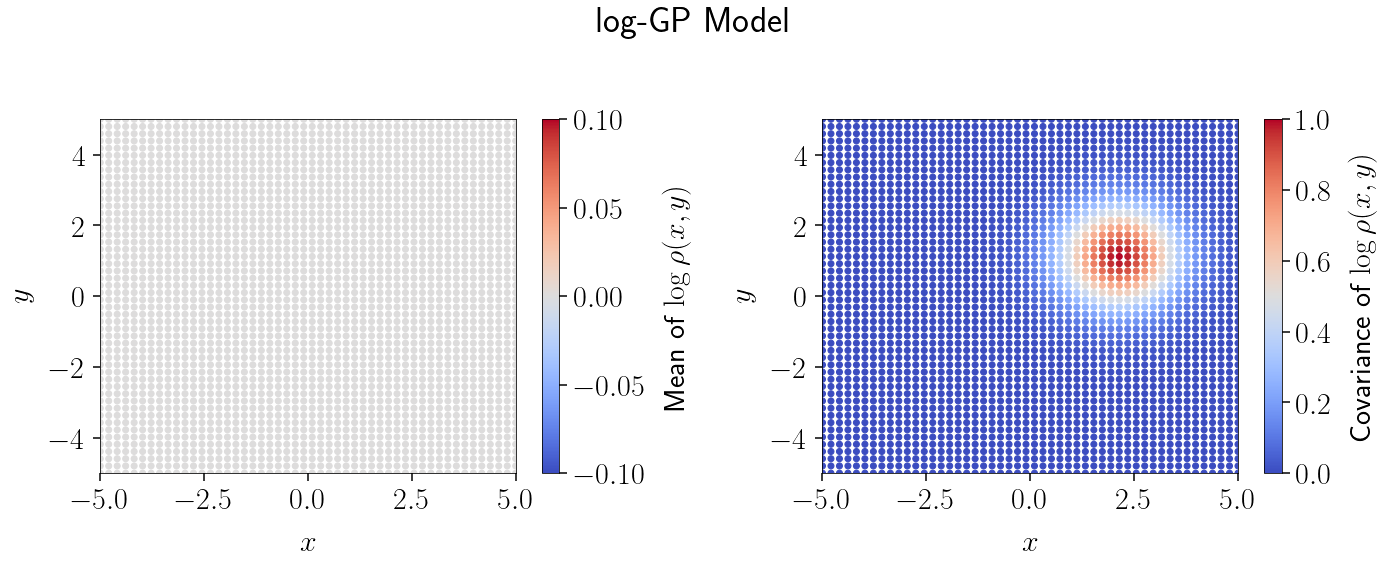

In [8]:
idx = 1780
# plot mean and cov 
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=Ygrid_mean, 
            cmap='coolwarm')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(label=r'Mean of $\log \rho(x, y)$')
plt.xlim([xgrid[0], xgrid[-1]])
plt.ylim([ygrid[0], ygrid[-1]])
plt.subplot(1, 2, 2)
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=Ygrid_cov[idx], 
            cmap='coolwarm')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(label=r'Covariance of $\log \rho(x, y)$')
plt.xlim([xgrid[0], xgrid[-1]])
plt.ylim([ygrid[0], ygrid[-1]])
plt.suptitle('log-GP Model', y=1.01)
plt.tight_layout()
plt.savefig('plots/log_GP_model.png', bbox_inches='tight')

In [9]:
# generate a realization of the log-GP at location of the inputs
# set random_state to a number to get deterministic results
Ygrid_samps = gp.sample_y(Xgrid, random_state=2021).reshape(len(Xgrid))

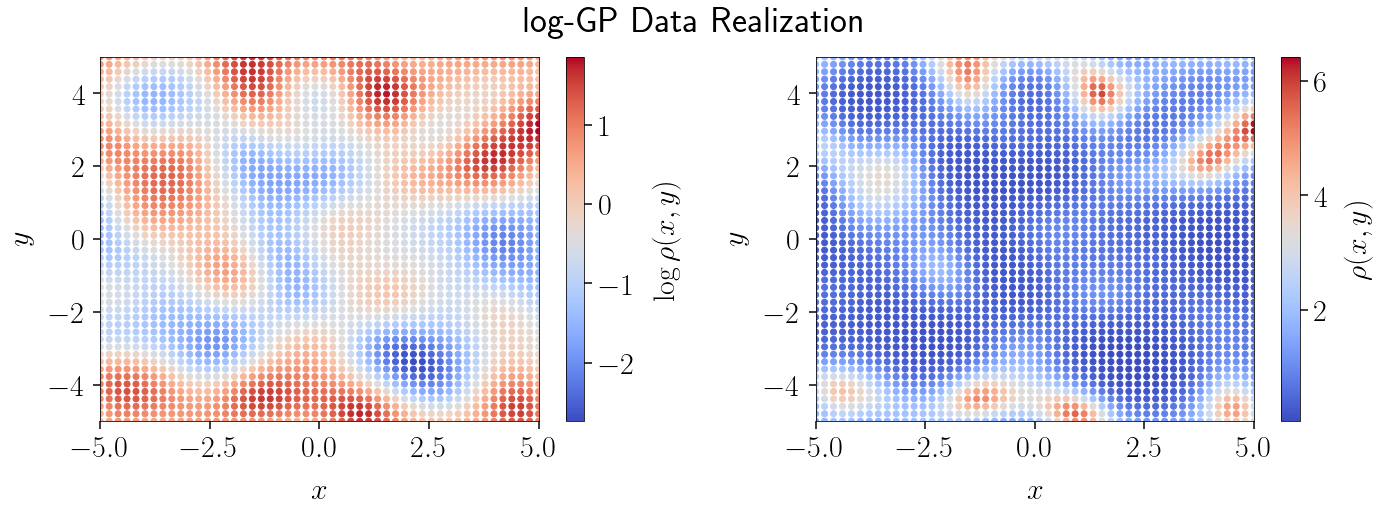

In [10]:
# plot realization 
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=Ygrid_samps, 
            cmap='coolwarm')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(label=r'$\log \rho(x, y)$')
plt.xlim([xgrid[0], xgrid[-1]])
plt.ylim([ygrid[0], ygrid[-1]])
plt.subplot(1, 2, 2)
plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=np.exp(Ygrid_samps), 
            cmap='coolwarm')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.colorbar(label=r'$\rho(x, y)$')
plt.xlim([xgrid[0], xgrid[-1]])
plt.ylim([ygrid[0], ygrid[-1]])
plt.suptitle('log-GP Data Realization', y=0.92)
plt.tight_layout()
plt.savefig('plots/data_realization.png', bbox_inches='tight')

In [ ]:
# run the intrinsic values (integrated dust) - polar coordinates section before running this
plt.figure(figsize=(160, 50))
rcParams.update({'font.size': 30})
fig, ax = plt.subplots(1, 1, figsize=(11,8))
pcm = ax.scatter(Xgrid[:, 0], Xgrid[:, 1], c=Y, norm=matplotlib.colors.PowerNorm(gamma=0.4), cmap='coolwarm', s = 50)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim([xgrid[0], xgrid[-1]])
ax.set_ylim([ygrid[0], ygrid[-1]])
ax.set_title('Attenuation Data Realization')
plt.colorbar(im, label=r'$A(x, y)$')
plt.savefig('plots/Integrated-dust.png', bbox_inches='tight')

In [11]:
from scipy import interpolate
logdust = interpolate.Rbf(Xgrid[:, 0], Xgrid[:, 1], Ygrid_samps, 
                          function='thin_plate',  # specific interpolation method
                          smooth=0)  # smoothing parameter (0=exact fit)

In [15]:
# simulate stars
n_stars = 10000  # with more stars, our model should get better

X = np.random.uniform(-5, 5, size=(n_stars, 2))  # true positions
X_obs = np.copy(X)  # observed positions
X_err = np.zeros_like(X_obs) # no errors for instrinsic values

# evaluate positions over our log-dust density field
Y = logdust(X[:, 0], X[:, 1])  # intrinsic values
Y_obs = np.copy(Y)
Y_err = np.zeros_like(Y_obs) 

# training/validation/testing splits
f_train, f_valid = 0.6, 0.2
f_test = 1. - f_train - f_valid
idx_train, idx_valid = int(n_stars * f_train), int(n_stars * (f_train + f_valid))

# split data
X_train, X_valid, X_test = X[:idx_train], X[idx_train:idx_valid], X[idx_valid:]
Xo_train, Xo_valid, Xo_test = X_obs[:idx_train], X_obs[idx_train:idx_valid], X_obs[idx_valid:]
Xe_train, Xe_valid, Xe_test = X_err[:idx_train], X_err[idx_train:idx_valid], X_err[idx_valid:]
Y_train, Y_valid, Y_test = Y[:idx_train], Y[idx_train:idx_valid], Y[idx_valid:]
Yo_train, Yo_valid, Yo_test = Y_obs[:idx_train], Y_obs[idx_train:idx_valid], Y_obs[idx_valid:]
Ye_train, Ye_valid, Ye_test = Y_err[:idx_train], Y_err[idx_train:idx_valid], Y_err[idx_valid:]

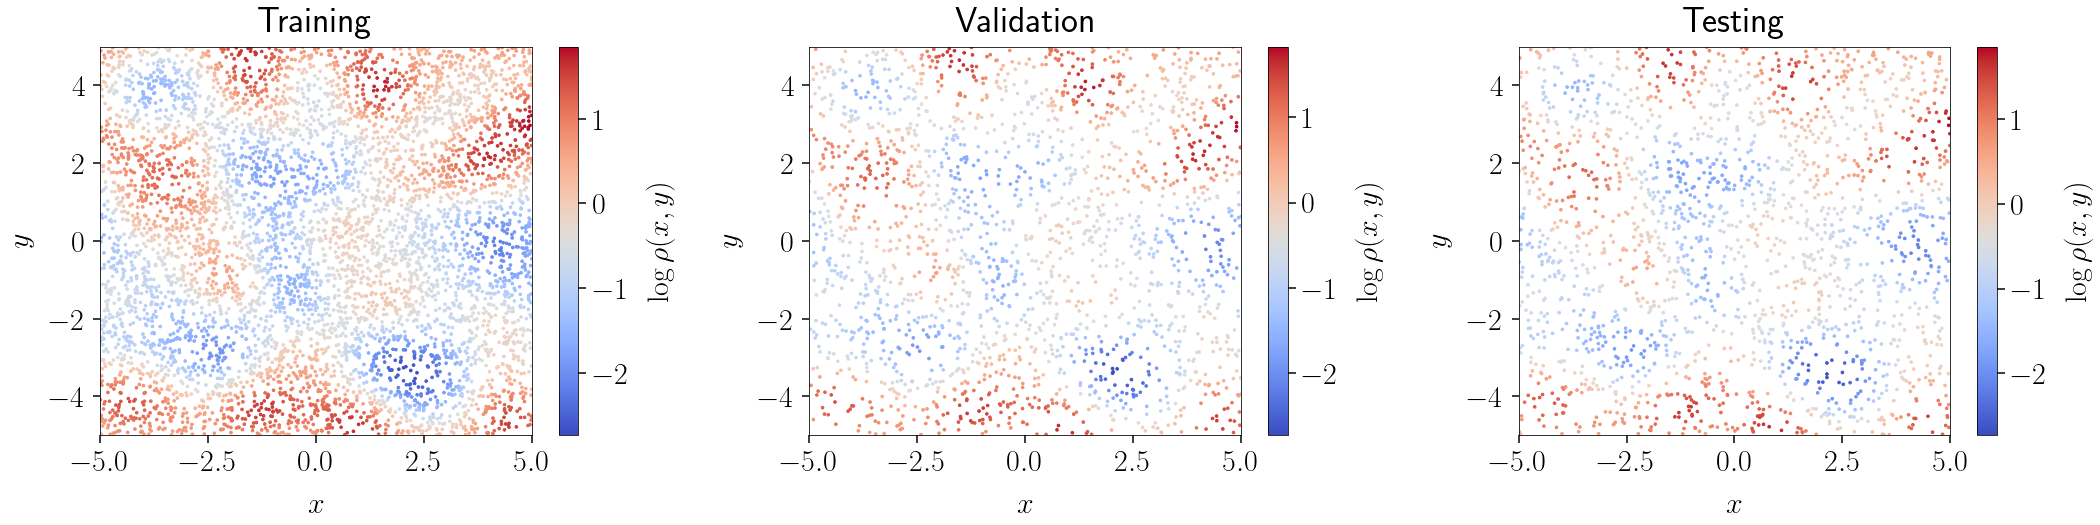

In [16]:
plot_data(r'$x$', r'$y$', r'$\log \rho(x, y)$', 'plots/intrinsic_logdust_data.png')

In [17]:
n_stars = 10000  # with more stars, our model should get better

X = np.random.uniform(-5, 5, size=(n_stars, 2))  # true positions
X_obs = np.copy(X)  # observed positions
X_err = np.zeros_like(X_obs) # no errors for instrinsic values

Y = np.exp(logdust(X[:, 0], X[:, 1]))  
Y_obs = np.copy(Y)
Y_err = np.zeros_like(Y_obs) 

# training/validation/testing splits
f_train, f_valid = 0.6, 0.2
f_test = 1. - f_train - f_valid
idx_train, idx_valid = int(n_stars * f_train), int(n_stars * (f_train + f_valid))

# re-define data splits
X_train, X_valid, X_test = X[:idx_train], X[idx_train:idx_valid], X[idx_valid:]
Xo_train, Xo_valid, Xo_test = X_obs[:idx_train], X_obs[idx_train:idx_valid], X_obs[idx_valid:]
Xe_train, Xe_valid, Xe_test = X_err[:idx_train], X_err[idx_train:idx_valid], X_err[idx_valid:]
Y_train, Y_valid, Y_test = Y[:idx_train], Y[idx_train:idx_valid], Y[idx_valid:]
Yo_train, Yo_valid, Yo_test = Y_obs[:idx_train], Y_obs[idx_train:idx_valid], Y_obs[idx_valid:]
Ye_train, Ye_valid, Ye_test = Y_err[:idx_train], Y_err[idx_train:idx_valid], Y_err[idx_valid:]

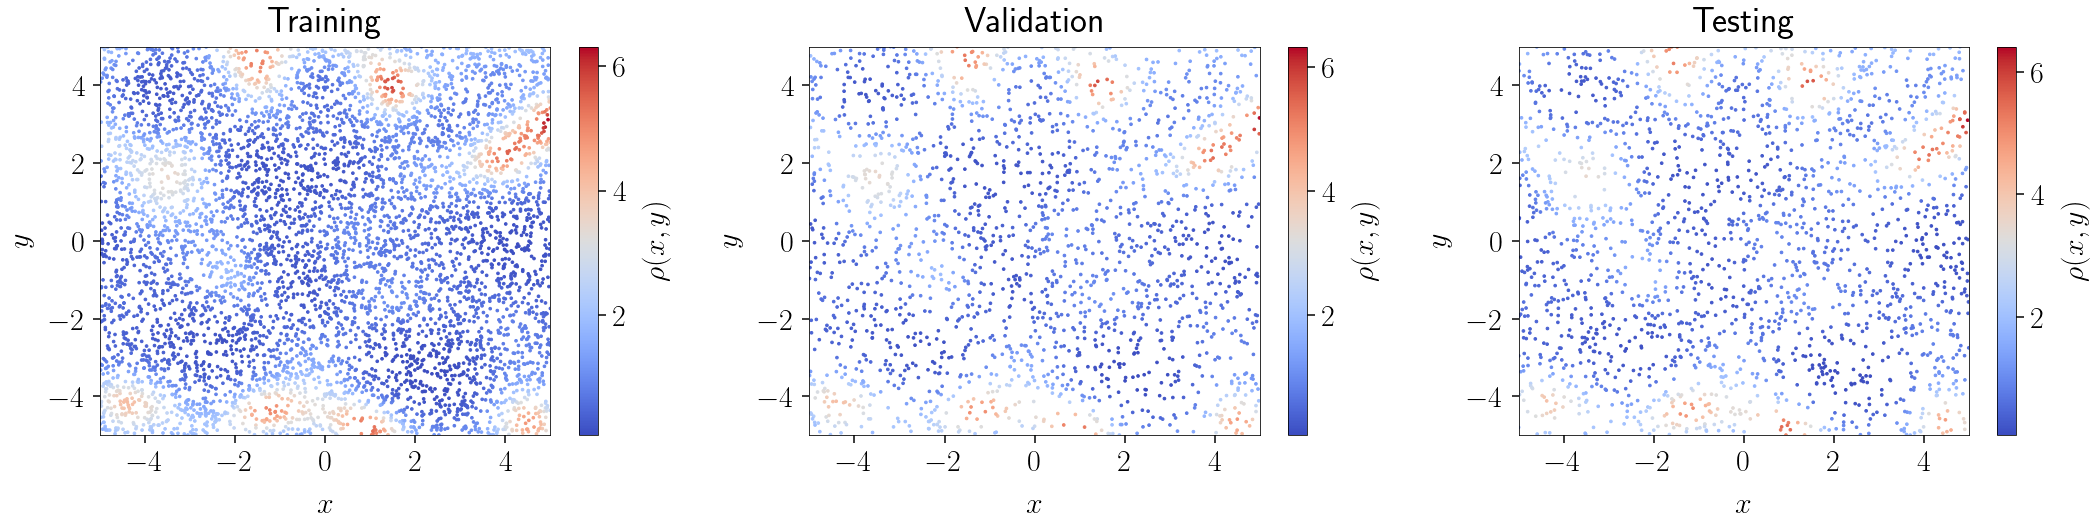

In [18]:
plot_data(r'$x$', r'$y$', r'$\rho(x, y)$', 'plots/intrinsic_dust_data.png')

In [21]:
n_stars = 10000  # with more stars, our model should get better
delta_r = 1e-2  # for reiman sum over
X_cart = np.random.uniform(-5, 5, size=(n_stars, 2)) # generate randomly positioned stars (x,y)
X = np.array([cart2pol(x, y) for x,y in X_cart]) # save polar coordinates
X_obs = np.copy(X) 
X_err = np.zeros_like(X_obs)
Y = []

for r, theita in X: # using intrinsic polar positions 
    dust = [] # list of intrinsic dust at points delta_r apart along integration line
    # get points delta_r apart from (0,0) to pt
    for r_prime in np.arange(0, r, delta_r):
        x, y = pol2cart(r_prime, theita)
        dust.append(np.exp(logdust(x, y))) # exponentiating to get rho
    # multiply by delta_r
    dust *= np.array([delta_r])
    Y.append(np.sum(dust))
Y = np.array(Y)
Y_obs = np.copy(Y)
Y_err = np.zeros_like(Y_obs)
# training/validation/testing splits
f_train, f_valid = 0.6, 0.2
f_test = 1. - f_train - f_valid
idx_train, idx_valid = int(n_stars * f_train), int(n_stars * (f_train + f_valid))

# delete this line for polar cooridnates
X = X_cart

In [ ]:
# re-define data splits
X_train, X_valid, X_test = X[:idx_train], X[idx_train:idx_valid], X[idx_valid:]
Xo_train, Xo_valid, Xo_test = X_obs[:idx_train], X_obs[idx_train:idx_valid], X_obs[idx_valid:]
Xe_train, Xe_valid, Xe_test = X_err[:idx_train], X_err[idx_train:idx_valid], X_err[idx_valid:]
Y_train, Y_valid, Y_test = Y[:idx_train], Y[idx_train:idx_valid], Y[idx_valid:]
Yo_train, Yo_valid, Yo_test = Y_obs[:idx_train], Y_obs[idx_train:idx_valid], Y_obs[idx_valid:]
Ye_train, Ye_valid, Ye_test = Y_err[:idx_train], Y_err[idx_train:idx_valid], Y_err[idx_valid:]

In [ ]:
# plot data
rcParams.update({'font.size': 15})
plt.figure(figsize=(40, 40))
fig, ax = plt.subplots(1, 1)
# for plotting change coordinate system
X_train_cart = np.array([pol2cart(r, phi) for r, phi in X_train])
X_valid_cart = np.array([pol2cart(r, phi) for r, phi in X_valid])
X_test_cart = np.array([pol2cart(r, phi) for r, phi in X_test])
# ax = fig.add_subplot(projection='polar')
# convert back to cartesion for easier plotting
pcm = ax.scatter(X_train_cart[:, 0], X_train_cart[:, 1], c=Y_train, norm=matplotlib.colors.PowerNorm(gamma=0.4), cmap='coolwarm', s = 2)
pcm = ax.scatter(X_valid_cart[:, 0], X_valid_cart[:, 1], c=Y_valid, norm=matplotlib.colors.PowerNorm(gamma=0.4), cmap='coolwarm', s = 2)
pcm = ax.scatter(X_test_cart[:, 0], X_test_cart[:, 1], c=Y_test, norm=matplotlib.colors.PowerNorm(gamma=0.4), cmap='coolwarm', s = 2)
fig.colorbar(pcm, ax=ax, extend='max', label=r'$\sim A(x,y)$')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xlim([xgrid[0], xgrid[-1]])
ax.set_ylim([ygrid[0], ygrid[-1]])
ax.set_title('Intrinsic Values (Integrated Dust)')
fig.savefig('plots/intrinsic_integrated_data.png')